# Time Series Analysis
#### Notebook Created on: 22 May 2018
##### Last Update: 26 Dec 2018
##### Version 5.0
##### Author: Vivek Krishnamoorthy

*I have prepared this material with the purpose of introducing **financial econometrics** (the statistical analysis of financial markets) to an audience that has little to no experience in the field.*

*There are a detailed set of references at the end of this document. Time Series Analysis is a fascinating and involved subject and I encourage you to explore the reference material for a deeper understanding. What we attempt to cover over the next couple of sessions is the proverbial 'tip of the iceberg'.*

### Introduction

Econometrics is the application of mathematical and statistical theory in economics (and increasingly in other social sciences too). It helps us to evaluate the relationships between different variables. For ex.
[the relationship between average classroom size and scholastic achievement](https://economics.mit.edu/files/8273) (Angrist & Lavy, QJE, 1999)

Least-squares regression is the most widely used method for modeling such relationships. It is known by many other names like "regression", "OLS", or "linear regression". OLS however is primarily used for [cross-sectional data](https://en.wikipedia.org/wiki/Cross-sectional_regression) i.e. data which is associated with a single period or point in time.

### Why Time Series Analysis?

However, **data that we encounter in macroeconomics and empirical finance are often in the form of a time series** i.e. sequential observations of the same variable. Inflation index numbers or stock price observations over time are time series. The time component of such data series makes their analysis and forecasting a challenge to handle.

In any kind of statistical modelling exercise, we collect a sample of data from the phenomenon or process that we are analyzing. 
* With cross-sectional data, we randomly sample from a population to make statistical inferences. 
* For time series data, we have historical observations of say, the stock price for the last 252 days (if we are modelling the price of a stock at time t). 

It is helpful to think of our time series sample as the random realization of a ***data generating process***. 


**Time series analysis** can be broadly defined as analyzing the historical data to understand the underlying process, its past behavior and then use it to predict the future behaviour of the process. 

As quantitative traders, we can use these analysis techniques in ***understanding asset price behaviour and make trading decisions based on it***.

We can write a time series as $$\{x_1, x_2, \dots, x_T\}$$ or $$\{x_t\},\: t = 1, 2,\dots, T$$


There is an important concept concerned with time series known as **stationarity**.

## Stationarity

A significant part of the analysis of time series data is about the stationarity of the data. As it turns out, financial time series are mostly non-stationary. So whenever we are analyzing our data, we first need to check for its presence and *'stationarize'* it if it is not so. 

Let us now look at what it means.

I use images from [Sean Abu's website](http://www.seanabu.com/) to buttress our understanding of stationarity and distinguish between stationary and non-stationary processes.

A stochastic process $\{x_t\}$ is *weakly stationary* or *covariance stationary* if
* $\mathrm{E}(x_t) = \mu \ne f(t)\implies$ The mean of the series is constant and not a function of time.
![alt text](Mean_nonstationary.png)
* $Var(x_t) = \sigma^2 \ne f(t)\implies$ The variance of the series is constant and not a function of time (This is called homoskedasticity).
![alt text](Var_nonstationary.png "Title")
* $Cov(x_t, x_{t+h}) = g(h) \ne f(t)\implies$ The covariance of the $t^{th}$ term and the $(t+h)^{th}$ depends only on the interval $h$ and is not a function of time.
![alt text](Cov_nonstationary.png "Title")

Another way to think of this is: *If there's any correlation between sequential observations and this correlation is only a function of the interval between them (and not the time period itself) , we say that it is covariance stationary*.

A stochastic process $\{x_t\}$ is *strongly stationary* or *strictly stationary* if the joint probability distribution function of $\{x_{t-s},\dots,x_t,\dots, x_{t+s}\}$ is independent of t for all s. $\implies$ The joint distribution of the random variables is not a function of time.

*A quick aside: Stochastic processes are those where you have a collection of random variables indexed by a set of numbers (usually time). Time series processes are a special type of stochastic process.*

### Why It Matters

* When a process is stationary, we can make forecasts since its statistical characteristics (such as mean, variance, covariance, etc.) are time invariant.
* In fact, if a time series process is non-stationary, it means that its statistical characteristics vary with time. Therefore any values (such as the mean, variance, etc) that the model would predict would not be reliable.
* In statistical modelling, a number of tests implicitly assume that the data being tested is stationary. So if we run these tests like a 'black-box' on non-stationary data, our results would be useless. 


## Two fundamental time series models

I now describe two key models, the **Gaussian White Noise** and the **Random Walk** models. This will help crystallize our intuitions on the time series behaviour of processes. In particular, it'll help us understand how the relation of sequential observations with each other can have an impact on how 'forecastable' they are.



### 1. Gaussian White Noise process

This is the building block for the basic ARMA models.

Here, we simulate and plot the Gaussian white noise process $\varepsilon_0$, $\varepsilon_1$,$\dots$, $\varepsilon_T$ where each observation is drawn from a standard normal distribution. All the observations are independent and identically distributed (iid).$$\varepsilon_t \sim N(0, 1)$$

By definition, the errors are serially uncorrelated and the expected mean of these errors is equal to zero.

Any kind of time series models that we build should ideally result in white noise residuals (errors). Why should it be so? Because this would mean that we have successfully fit a model that captures the key dynamics of the underlying process. The only part which is unexplained by the model is random error. In other words, the difference between the values we forecast and the the values that would eventually occur would be residuals that would be indistinguishable from white noise.



` We import all the required libraries below. In case you don't have any of the below, please install them using either the conda or the pip package managers
`

#### A short sidenote:

The key libraries that we deploy when dealing with time series analysis are the following:

- [NumPy](http://www.numpy.org/): It is the workhorse for Python and other libraries to do complex and repetitive math operations efficiently. Every other package mentioned below depends on NumPy array operations for the numerical heavy lifting.
- [Matplotlib](https://matplotlib.org/): Used for plotting data
- [SciPy](https://www.scipy.org/) : Primary Python library for math, science and engineering applications. Builds on NumPy to add many more useful functionalities.
- [pandas](https://pandas.pydata.org/): Has handy data stuctures for loading, handling and manipulating data. It is especially suited for time series and works well in conjunction with the above libraries.
- [Statsmodels](https://www.statsmodels.org/stable/index.html): Used in advanced data exploration, statistical modeling of time series and running statistical tests
- [ARCH](https://pypi.org/project/arch/): Used in volatility modelling of financial time series


In [4]:
import os
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import quandl
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms
import scipy.stats as scs
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import seaborn as sns
# warnings.filterwarnings(action='once')
sns.set()

`The below mentioned function plots a time series and helps us analyze important statistical characteristics visually.`

In [5]:
def tsplot(y, lags=None, figsize=(10, 8), style='fivethirtyeight'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax, linewidth=1.5)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        
        plt.tight_layout()
    
    return


`Let's now model a White Noise process and examine the output`

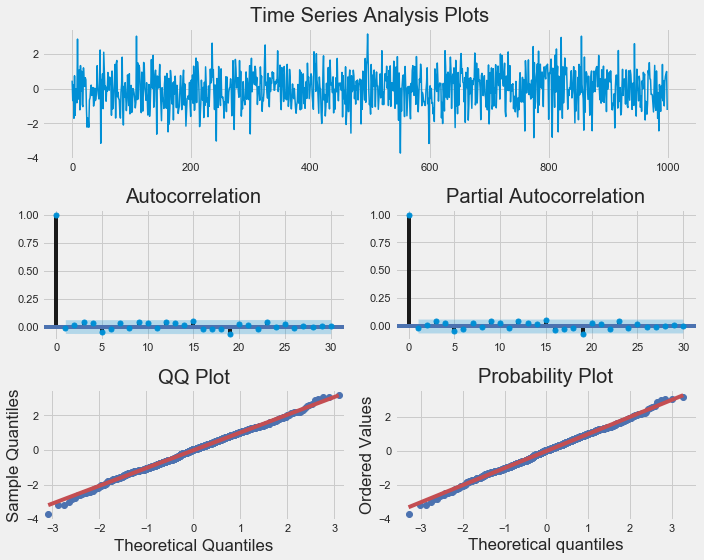

In [6]:
np.random.seed(12)
# Plotting discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

In [4]:
print("Random Series\n -------------\nμ: %.3f \nσ^2: %.3f \nσ: %.3f"
      %(randser.mean(), randser.var(), randser.std()))

Random Series
 -------------
μ: -0.012 
σ^2: 1.053 
σ: 1.026


`From the plots, we can see that the data is distributed randomly and follows a Gaussian white noise process.`

#### Understanding the time series plots

* The first row at the top plots $\epsilon_t$ versus t.
* The second row has the plots of the [autocorrelation function (ACF)](https://en.wikipedia.org/wiki/Autocorrelation) and the [partial autocorrrelation function (PACF)](https://en.wikipedia.org/wiki/Partial_autocorrelation_function). These plots are called correlograms.
    * ACF, as the name suggests, is the correlation of a variable with itself. Here, rather than finding the correlation between two variables, say $x$ and $y$, we compute the correlation between $x_t$ and $x_{t-h}$. We plot these autocorrelations at different lags (1, 2, ...). What interests us is whether there is a pattern in the series or is it truly random. There are two key features that we look for:
        1. Does the ACF plot cut off abruptly?
        2. Does the ACF plot decay gradually/exponentially?
    * PACF, as we would imagine from the name, computes the 'partial' correlation of a variable with itself. Here, we plot the autocorrelations at different lags (1, 2, ...) but after adjusting for the effects of the smaller lags. For ex. the partial autocorrelation calculated at lag 4, would adjust for the effects at lags 1, 2 and 3.

By looking at the correlograms of ACF and PACF, we can detect if any autocorrelation is still present after removing the effects of any deterministic trends, or seasonality effects.

Once we have fitted a time series model, the correlograms help us to judge if a model is a good fit or if need to further refine it to remove any additional serial correlations.

* The third row has [QQ plots](https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm) and the [normal probability plots](https://en.wikipedia.org/wiki/Normal_probability_plot).
    * QQ plots are used to compare the distributions of the errors with a normal distribution. If we find that the dots are more or less on the 45 degree line, then it means that the errors are normally distributed (which is what we'd like to see). 
    * Similarly, the normal probability plot also assesses whether or not the data is approximately normally distributed. If the plotted points form an approximately straight line, it indicated normality.

The Q-Q plot should is more helpful in finding deviations at the tails whereas the P-P plot is more suited for deviations at the centre of the distribution.

These two plots can also be used in comparing our empirical data to other theoretical distributions (apart from the normal distribution).

### Why Do We Care So Much about White Noise (It's noise after all, right? :))

Ipso facto, there is nothing particularly interesting about Gaussian White Noise. I'd go so far as to say, it's actually quite boring. If say $\epsilon_t$ is unusually high, there's no reason for $\epsilon_{t+1}$ to continue to stay high or go low. It's literally the equivalent of one coin toss having no bearing on the next. 

But I digress. The White Noise process does not capture the most interesting feature of time series which is persistence. However, as we'll see, more sophisticated models are created by taking different combinations of $\epsilon_t$.

### 2. Random Walk process (Without a Drift)

The random walk time series model can be represented by the equation $$x_t = x_{t-1} + \epsilon_t$$, where $\epsilon_t$ is white noise as defined above.


In [ ]:
np.random.seed(8)
n_samples = 1000

ϵ = np.random.normal(size=n_samples)
x = ϵ.copy()
for t in range(n_samples):
    x[t] = x[t-1] + ϵ[t]

_ = tsplot(x, lags=30)


As we can see from the above plots, the random walk model is a non-stationary process.
If we rearrange the above equation, we get $$\epsilon_t = x_t - x_{t-1}$$

Notice that when we compute the first differences of our series, we get the random walk process!
Calculating first differences is one of the commonest ways of transforming a non-stationary process into a stationary process. Let me elaborate a little more on this transformation.

## Steps involved in transforming non-stationary series to a stationary process

We can do this either by taking differences or log differences ( the latter is preferred). We can then visually inspect the time series plot and run the [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) also referred to as the ADF test. The alternative hypothesis of the ADF test is that the series is stationary. So we check if p-value < 5 %. If test fails, we difference it again and check for stationarity.


Let's examine the time series analysis plots of the first difference of $x_t$ and see if we get what we expect to see ( a white noise process).


In [ ]:
_ = tsplot(np.diff(x), lags=30)

Lo and behold! It's exactly in line with our intuitions. Let's now try the random walk model on some financial data. 

In [ ]:
dftest = adfuller(np.diff(x), autolag="AIC")

In [ ]:
dftest[1]

### Working with real market data

In [3]:
tickers = ['^NSEI3','JUBLFOOD.NS','MPHASIS.NS']

collate_data = lambda y: pd.read_csv(y + '.csv', index_col="Date", parse_dates=True)['Adj Close']

data = pd.DataFrame({ticker:collate_data(ticker) for ticker in tickers})
# computing log price differences
lprice = np.log(data)
ret = (lprice - lprice.shift(1)).dropna()

In [4]:
data.head()

,JUBLFOOD.NS,MPHASIS.NS,^NSEI3
Date,,,
2007-10-08,NaN,207.633057,5085.100098
2007-10-09,NaN,216.897461,5327.250000
2007-10-10,NaN,222.233734,5441.450195
2007-10-11,NaN,219.936157,5524.850098
2007-10-12,NaN,217.156845,5428.250000


In [7]:
data.tail()7

,JUBLFOOD.NS,MPHASIS.NS,^NSEI3
Date,,,
2018-09-28,1229.750000,1173.250000,10930.450195
2018-10-01,1240.750000,1159.900024,11008.299805
2018-10-03,1192.099976,1159.400024,10858.250000
2018-10-04,1125.699951,1148.099976,10599.250000
2018-10-05,1152.050049,1120.599976,10316.450195


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2123 entries, 2010-02-08 to 2018-10-05
Data columns (total 3 columns):
JUBLFOOD.NS    2123 non-null float64
MPHASIS.NS     2123 non-null float64
^NSEI3         2123 non-null float64
dtypes: float64(3)
memory usage: 66.3 KB


In [5]:
data.dropna(inplace=True)

In [6]:
ret.head()

,JUBLFOOD.NS,MPHASIS.NS,^NSEI3
Date,,,
2010-02-09,0.014852,0.022454,0.006752
2010-02-10,-0.038402,-0.000417,-0.007424
2010-02-11,-0.017384,0.012713,0.014535
2010-02-15,-0.007824,-0.002337,-0.005172
2010-02-16,0.004789,0.017464,0.011141


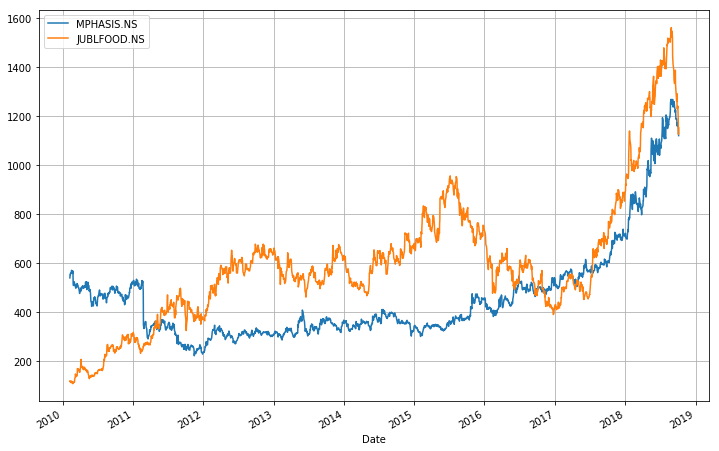

In [7]:
data[['MPHASIS.NS', 'JUBLFOOD.NS']].plot(linewidth=1.5, grid=True, figsize=(12, 8))

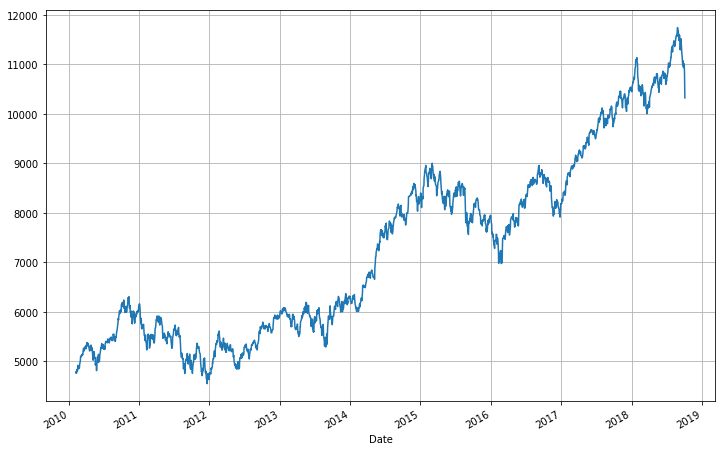

In [8]:
data['^NSEI3'].plot(linewidth=1.5, grid=True, figsize=(12, 8))

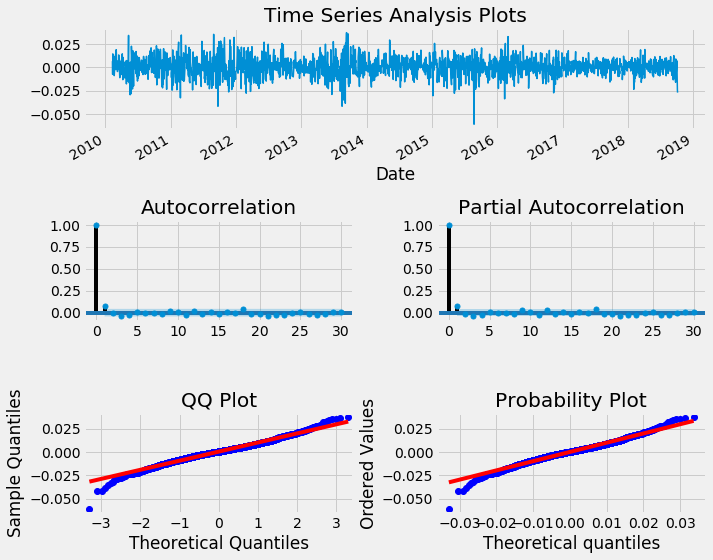

In [14]:
_ = tsplot(ret['^NSEI3'], lags=30)
plt.savefig('output3.png')

` The time series plot looks quite similar to white noise at first glance. However, the volatility seems to be time-varying. Notice also the QQ and the probability plots. Both indicate that the process is approximately normal but with fat tails. Also, when we closely examine the correlograms, there appears to be some significant autocorrelations at lags 1, 2 and 4. This means we could have better models to describe the daily returns process.`

You can read more about fat tails [here](https://www.investopedia.com/terms/t/tailrisk.asp).

In [ ]:
dftest = adfuller(ret['JUBLFOOD.NS'], autolag="AIC")
dftest2 = adfuller(data['JUBLFOOD.NS'].dropna(), autolag="AIC")

In [ ]:
dftest[1], dftest2[1]

`The ADF test results confirm what we can see visually. The returns series is stationary and the price series is not.`

### Basic ARMA Models

These are a class of models which are created by taking linear combinations of white noise. **All of the below models would have good explanatory and predictive power only if the time series is covariance stationary.**

$$AR(1) : x_t = \phi x_{t-1} + \epsilon_t$$
$$MA(1) : x_t = \epsilon_t + \theta \epsilon_{t-1}$$

$$AR(p) : x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \dots + \phi_p x_{t-p} + \epsilon_t$$
$$MA(q) : x_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_q$$

$$ARMA(p, q) : x_t = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \dots + \phi_p x_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_q$$


Notice how all the models that we have seen above will generate sequences $\{x_t\}$ that can be computed with 
* a starting value for the $\{x_t\}$ process, $x_0$
* a sequence of realizations of the white noise process $\{\epsilon_t\}$

Autoregressive models are a multivariate extension of the random walk model. What this means in English is that the current value of the process is a linear combination of past observations.

Moving Average models are very similar to $AR(p)$ models. In $MA(q)$ models, the current value of the process is a linear combination of past error terms.

An even more realistic model combines the characteristics of $AR$ and $MA$ processes and is called the Auto Regressive Moving Average (ARMA) model.

* $AR(p)$ models attempt to explain the mean reversion and trending behaviours that we observe in asset prices.
* $MA(q)$ models try to capture the idiosyncratic shocks that are observed in financial markets. A white noise process models these shocks quite well. We can think of events like terrorist attacks, earnings surprises, sudden political changes, etc. as the random shocks affecting the asset price movements.

You can learn more about these models by going through the relevant references cited at the end of this document.

We will now go through simulations of different processes to get a better feel for them and their key statistical properties.

### Simulation of an $AR(1)$ process with $\phi = 0.75$

In [ ]:
np.random.seed(45)
n_samples = int(1000)
ϕ = 0.75

ϵ = np.random.normal(size=n_samples)
x = ϵ.copy()

for t in range(n_samples):
    x[t] = ϕ * x[t-1] + ϵ[t]
    
_ = tsplot(x, lags=30)
#plt.savefig('try.png')

### Fitting an $AR(p)$ model

` We use the statsmodels package to estimate the coefficients and also the order. If the AR model is correct, then the estimated phi coefficient should be approximately equal to the true value of 0.75 and the order of the process should be 1.`

In [ ]:
sm.tsa.AR.select_order?

In [ ]:
mdl = sm.tsa.AR(x).fit(maxlag=30, ic='aic', trend='nc')
est_order = sm.tsa.AR(x).select_order( maxlag=30, ic='aic', trend='nc')

In [ ]:
true_order = 1
print('Estimated ϕ: %3.5f | Estimated order: %s'%(mdl.params, est_order))
#print("Estimated ϕ", round(mdl.params[0], 2))
#, est_order)
print("\nTrue ϕ = %3.3f | True order: %s" %(ϕ, 1))

### Simulation of an  $MA(1)$  process with $\theta = 0.75$

In [ ]:
np.random.seed(253)
n = int(1000)

# Setting the AR(p) phis equal to 0
phis = np.array([0.])
thetas = np.array([0.75])

## Adding zero-lags and negate the phis
ar = np.r_[1, -phis]
ma = np.r_[1, thetas]

ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(ma1, lags=30)

### Fitting an $MA(q)$ model

` We run a set of steps to estimate the coeeficients of the MA process. Let's try and fit an MA(1) as shown.`

In [ ]:
max_lag = 30
mdl = smt.ARMA(ma1, order=(0, 1)).fit(
    maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())

### Simulation and fitting of an $ARMA(2, 2)$ process with $\phi$ = [0.6, -0.25] and $\theta$ = [0.5, -0.4]

In [ ]:
max_lag = 30

n = int(10000) # a lot of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

ϕ = np.array([0.6, -0.25])
θ = np.array([0.5, -0.4])
ar = np.r_[1, -ϕ]
ma = np.r_[1, θ]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag)

mdl = smt.ARMA(arma22, order=(2, 2)).fit(
    maxlag=max_lag, method='mle', trend='nc', burnin=burn)
print(mdl.summary())

### Simulating and fitting an $AR(3)$ process with $\phi$ = [0.4, -0.3, 0.25]

In [ ]:
n = int(1000)
ϕ = np.array([0.4, -0.3, 0.25])
θ = np.array([0.])

# Please go through the documentation of statsmodels.org.

ar = np.r_[1, -ϕ]
ma = np.r_[1, θ]

ar3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar3, lags=30)

` If we naively fit a model, it will fit the model with a number of lagged variables as shown below (resulting in overfitting).`

In [ ]:
mdl = smt.AR(ar3).fit()
print("The number of lagged variables are ", len(mdl.params))
print("The coefficients of the lagged variables are ", mdl.params)
print("The corresponding standard errors are", mdl.bse)


Our guiding principle when we build models should be [Occam's Razor](http://pespmc1.vub.ac.be/OCCAMRAZ.html). We would therefore want a model with the fewest parameters that can explain our time series process. We therefore use information criterion (and [Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) in particular). When choosing from multiple competing models, we choose the one which has the smallest AIC. The idea is that we pick the model that has the 'right' (as defined by AIC or any other information criterion) balance of fitting our data reasonably well while not being overly complex.


In [ ]:
N = 10
AIC = np.zeros((N,1))

for i in range(N):
    model = smt.AR(ar3)
    model = model.fit(maxlag=(i+1))
    AIC[i] = model.aic
    
AIC_min = np.min(AIC)
model_min = np.argmin(AIC)

print("The model with the lowest AIC has", model_min+1, "parameters")

### Evaluating the Residuals

The aim of any model fitting exercise for our time series is that the errors should be white noise. So, the final step after fitting our model is to examine its residuals.
We do this by running the [Jarque-Bera test](http://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.jarque_bera.html). Our null hypothesis is that the data is normally distributed. 

In our case, we would perform the test to check the normality of the residuals after we fit the model based on the AIC as we have done above.

In [ ]:
mdl = smt.AR(ar3)
mdl = mdl.fit(maxlag=(model_min+1))


`Here's a visual examination of the residuals`

In [ ]:
tsplot(mdl.resid, lags=30)

`As we'd hoped, the residuals look like white noise. Visually, it looks the way we'd like it to. Let's now run the test and check if our hunch is indeed correct.`

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")


### Applying various AR and MA models to real financial market log returns

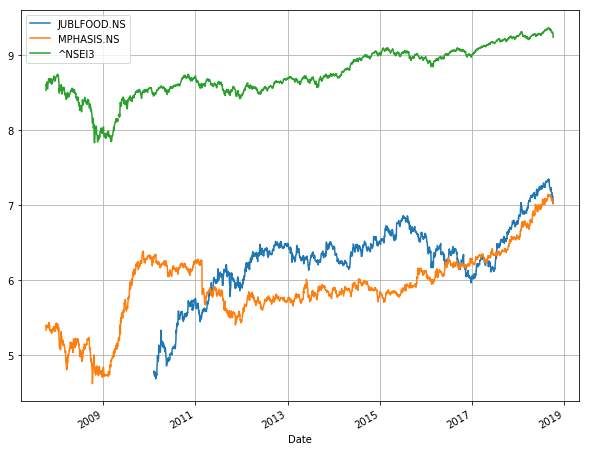

In [9]:
lprice.plot(figsize=(10, 8), linewidth=1.5, grid=True)

` Selecting the best lag order while using AR(p) for the Nifty returns`

C:\Miniconda3\envs\bayesian\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The best estimated lag order is 1


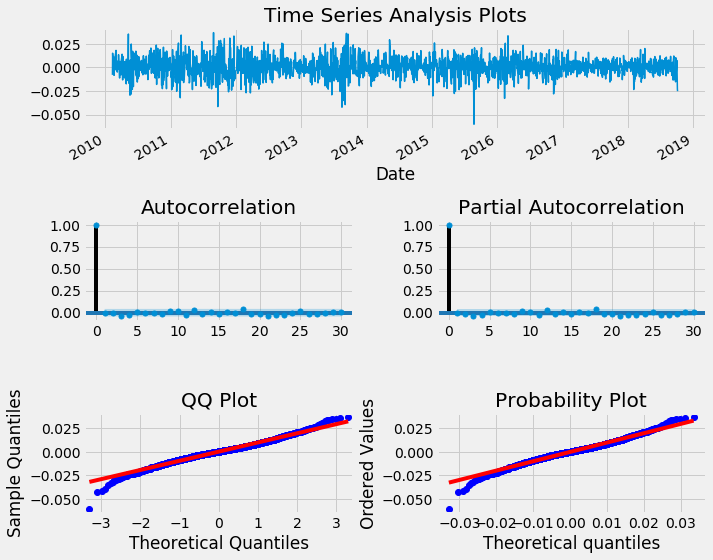

In [16]:
max_lag = 30
mdl = smt.AR(ret['^NSEI3']).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(ret['^NSEI3']).select_order(maxlag=max_lag, ic='aic', trend='nc')

print("The best estimated lag order is", est_order)
_ = tsplot(mdl.resid, lags=max_lag)

`You can later try running this on other assets. There would be times when you could end up with even an an AR(30) model! These are way too many parameters to be useful in real life. The QQ and probability plots also clearly show fat tails. Autoregressive processes are more likely to have extreme values than normal processes. Since there is serial correlation between successive values, if the value goes unusually high or low it is likely to stay at those levels for some time. This kind of behavior results in fat tails in the probability distribution. From the above plots, we can safely say that the process is more complex than just being a weighted average of past returns. We need to dig deeper.`

` A test of normality of residuals also proves that the conclusions we drew from the previous graph were correct.`

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

` We'll now try fitting in an MA(3) to model Nifty log returns`

In [ ]:
max_lag = 30
mdl = smt.ARMA(ret['^NSEI3'], order=(0, 3)).fit(maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)

In [ ]:
max_lag = 30
mdl = smt.ARMA(ret['^NSEI3'], order=(0, 5)).fit(maxlag=max_lag, method='mle', trend='nc')
print(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

### Going back to ARMA models

` Fitting an ARMA model can be done similar to how we did it for AR or MA models i.e. by selecting the model with the lowest AIC. We do so by trying models with different combinations of p and q. We will then apply the Ljung-Box test to determine if a good fit has been achieved. If the p-value is higher than that required for significance, we can then conclude that that the residuals are independent and Gaussian white noise.`

### Simulating an $ARMA(3, 2)$ model with $\phi = [0.5, -0.4, 0.25]$ and $\theta = [0.5, -0.3]$

In [ ]:
max_lag = 30

n = int(10000)
burn = 2000

ϕ = np.array([0.5, -0.4, 0.25])
θ = np.array([0.5, -0.3])

ar = np.r_[1, -ϕ]
ma = np.r_[1, θ]

arma32 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma32, lags=max_lag)

### Fitting the most suitable ARMA model

` The order with the smallest AIC would be picked.`

In [ ]:
best_aic = np.inf
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(arma32, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except:
            continue
            
print("aic : ",best_aic, "| order : ",best_order)

The [Ljung-Box test](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test) is used to check for randomness of the time series at different lags. Its null hypothesis is that the serial correlations of a time series are zero. We run it and form conclusions based on the p-values obtained.

In [ ]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

`The p-value of 0.94 is greater than the 5% significance level. We therefore fail to reject the null hypothesis and conclude that the ARMA(3, 2) model provides a good fit.`

`This is precisely what we'd expect to see since the time series data that we're trying to model is a randomly created simulation of the ARMA(3, 2) process.`

In [ ]:
_ = tsplot(best_mdl.resid, lags=max_lag)

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(best_mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

### Fitting an ARMA model to Nifty returns

In [ ]:
best_aic = np.inf
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(ret['^NSEI3'], order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except:
            continue
            
print("aic : ",best_aic, "| order : ",best_order)

In [ ]:
_ = tsplot(best_mdl.resid, lags=max_lag)

In [ ]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

In [ ]:
score, pvalue, _, _ = jarque_bera(best_mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

Despite combining the AR and MA models to produce ARMA models, we will more often than not encounter cases where we would be unable to fully explain the time series process i.e. the residuals obtained after our model fitting exercises would not be Gaussian White Noise.

This sets us up nicely to look at the ARIMA/GARCH models which comes to our rescue.

### Autoregressive Integrated Moving Average Models - $ARIMA(p, d, q)$

[ARIMA models](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) are a generalization of the ARMA class of models. We transform many non-stationary series to a stationary form by differencing them. We sometimes do so successively.

We'd done precisely this when we converted the random walk model into a stationary series (which was white noise).
To recap, this is what we'd done. $$\epsilon_t = x_t - x_{t-1}$$

The above step that we had performed is called first-differencing. When we perform this step repeatedly, $d$ times, to convert a non-stationary series to a stationary series, we define the original series to be $Integrated\; of\; order\; d$.

An $ARIMA(p, d, q)$ model when differenced $d$ times gives us an $ARMA(p, q)$ model.
ARIMA models can be estimated/fitted using the [Box-Jenkins](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method) approach.

As a side note, seasonality effects which is often seen in commodity prices are well modeled by $Seasonal\; ARIMA\; (SARIMA)$. You can read more about it [here](https://newonlinecourses.science.psu.edu/stat510/node/67/).


### Simulating an $ARIMA(2, 1, 1)$ model with $\phi = [0.5, -0.25]$ and $\theta = [-0.5]$ and then fitting an $ARIMA$ model to our simulated data

In [ ]:
max_lag = 30

n = int(10000)
burn = 2000

ϕ = np.array([0.5, -0.25])
θ = np.array([-0.5])

ar = np.r_[1, -ϕ]
ma = np.r_[1, θ]

arma21 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
arima211 = arma21.cumsum()
_ = tsplot(arima211, lags=max_lag)

In [ ]:
best_aic = np.inf
best_order = None
best_mdl = None

pq_rng = range(5)
d_rng = range(2)
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(arima211, order=(i, d, j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except:
                continue
            
print("aic : ",best_aic, "| order : ",best_order)

In [ ]:
_ = tsplot(best_mdl.resid, lags=30)

In [ ]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(best_mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

`We perform the Ljung-Box test as well as the Jarque-Bera test and find strong evidence for the ARIMA(2, 1, 1) model to be a good fit as expected.`

## Steps involved in building a time series model

The reality is that building and testing a model does not follow any rigid pattern of predefined steps. However, it is useful as a starting point to picture it as a set of key steps. In practice, we will move back and forth between these steps

1. Download asset prices
2. For any kind of analysis, we would like our time series to be stationary. So we test for it. We do so using the [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) also referred to as the ADF test. The alternative hypothesis of the ADF test is that the series is stationary. So we check if p-value < 5 %.
3. Rather than trying out different combinations of ARMA, we can directly use ARIMA since it would reduce a non-stationary series to a stationary series by sequentially differencing.
4. Choose the ARIMA model based on lowest AIC.
5. Use the Ljung-Box and the Jarque-Bera tests to check the behaviour of the residuals.
6. Run the ADF test on the residuals of the model to check for stationarity. If p-values < 0.05, our model for returns should be acceptable.
7. Based on the step 5/6, use ARCH/GARCH to model the volatility.


### Checking the ARIMA model fitment for the Nifty log prices

We will cycle through a non-trivial number of combinations of (p, d, q)

In [ ]:
def best_arima(dataframe):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(dataframe, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [ ]:
model = best_arima(ret['^NSEI3'])

In [ ]:
_ = tsplot(best_mdl.resid, lags=30)

In [ ]:
order = model[1]
p = order[0]
d = order[1]
q = order[2]

In [ ]:
print(p, d, q)

In [ ]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(best_mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

` We have iterated through the ARIMA model on the log prices of the Nifty. The best model is integrated of order 1. This is expected because the first difference of log prices would give us the asset returns. We still see conditional volatility here.`


`Some interesting exercises for you to try can be where you look at say the S&P 500 and try to model its log prices or returns. Check what happens when you exclude periods of high volatility like the 2008 credit crisis.`

In [ ]:
lprice.dropna(inplace=True)

In [ ]:
best_aic = np.inf
best_order = None
best_mdl = None

pq_rng = range(5)
d_rng = range(2)
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                tmp_mdl = smt.ARIMA(lprice['JUBLFOOD.NS'], order=(i, d, j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except:
                continue
            
print("aic : ",best_aic, "| order : ",best_order)

In [ ]:
_ = tsplot(best_mdl.resid, lags=30)

In [ ]:
sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)

In [ ]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(best_mdl.resid)
if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")

When analyzing time series, we need to pay close attention to conditional heterskedasticity which is a prevalent feature of financial data generating processes. One of the main challenges that quantitative traders face is detecting the change in the behaviour of financial markets (as measured by its statistical characteristics). This could occur due to change in governments, or its policies, or any other macroeconomic effect. This is often referred to as *regime shift* or *regime change*.

## Autoregressive Conditional Heteroskedastic Models (ARCH)

` 
We have seen that the ARIMA and ARMA class of models do not account for time-varying volatility (or conditional heteroskedasticity). The ARCH model accounts for the changes in conditional variances. If we observe the name of the model carefully, we can make a pretty good guess what the model does. It models the conditional variance over time based on the past values of the variance (hence the name autoregressive).`

### Autoregressive Conditional Heteroskedastic Model of Order 1: $ARCH(1)$

A time series $\{\epsilon_t\}$ is given at each instance by: $$\epsilon_t = \sigma_t w_t$$ where $\{w_t\}$ is discrete white noise, with zero mean and unit variance and $\sigma_{t}^2$ is given by: $$\sigma_{t}^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2$$ where $\alpha_0$ and $\alpha_1$ are parameters of the model.

We then say that $\{\epsilon_t\}$ is an ***autoregressive conditional heteroskedastic model of order 1*** or $ARCH(1)$. The model can be written as: $$\epsilon_t = w_t \sqrt{\alpha_0 + \alpha_1 \epsilon_{t-1}^2}$$

Using first principles, we can trivially prove that $$Var(\epsilon_t) = \alpha_0 + \alpha_1\;Var(\epsilon_{t-1})$$

Clearly, we now see that the variance of the series is modelled as a linear function of the past variance (previous time period) of the series. In other words, we can think of an $ARCH(1)$ **process as an  $AR(1)$ process that is applied to the variance of a time series**.

Let's compare the $ARCH(1)$ and the $AR(1)$ models. $$AR(1): x_t = \phi_0 + \phi_1\;x_{t-1} + w_t$$ $$ARCH(1): Var(\epsilon_t) = \alpha_0 + \alpha_1\;Var(\epsilon_{t-1})$$

The models have a similar form except for the white noise term.

### Autoregressive Conditional Heteroskedastic Model of Order q: $ARCH(q)$

We can extend the ARCH model to higher order lags. $$ARCH(q): \epsilon_t = w_t \sqrt{\alpha_0 + \sum_{i=1}^q\alpha_i\;\epsilon_{t-i}^2}$$

Again, it is useful to think of $ARCH(q)$ as the application of $AR(p)$ to the variance of a time series process.

***At this stage, it's natural to wonder if we can use the framework of the linear ARMA models to the variance of a time series. The answer is yes! ***

This is the motivation behind the **Generalized ARCH model or GARCH**.

## Generalized Autoregressive Conditional Heteroskedastic Models (GARCH)

### Generalized Autoregressive Conditional Heteroskedastic Model of Order p, q: $GARCH(p, q)$

A time series $\{\epsilon_t\}$ is given at each instance by: $$\epsilon_t = \sigma_t w_t$$ where $\{w_t\}$ is discrete white noise, with zero mean and unit variance and $\sigma_{t}^2$ is given by: $$\sigma_{t}^2 = \alpha_0 + \sum_{i=1}^q\;\alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^p\;\beta_j \sigma_{t-j}^2$$ where $\alpha_i$ and $\beta_j$ are parameters of the model.

We then say that $\{\epsilon_t\}$ is a ***generalized autoregressive conditional heteroskedastic model of order p, q*** denoted by $GARCH(p, q)$.

Notice that we have added the moving average

Thus $GARCH(p, q)$ can be interpreted as the application of the $ARMA(p, q)$ model on the variance of a time series.

### Simulation of an $ARCH(1)$ process

In [ ]:
np.random.seed(1)

α_0 = 2
α_1 = 0.5

n = 1000

w = np.random.normal(size=n)
ϵ = w.copy()

for t in range(len(ϵ)):
    ϵ[t] = w[t] * np.sqrt((α_0 + α_1 * ϵ[t-1] ** 2))

    
tsplot(ϵ, lags=30)

` The time series looks just like Gaussian White noise. Let's observe the output when we plot the square of the series`

In [ ]:
tsplot(ϵ ** 2, lags=30)

`The correlograms of the ACF and PACF show significant values at lag 1. The ACF plot decays over a few more lags. This indicates an AR(1) model for the variance may be appropriate.`

### Simulation of a $GARCH(1, 1)$ process

In [ ]:
np.random.seed(2)

α_0 = 0.2
α_1 = 0.5
β_1 = 0.3

n = 10000
w = np.random.normal(size=n)

ϵ = np.zeros_like(w)
σ_sq = np.zeros_like(w)


for t in range(1, len(ϵ)):
    σ_sq[t] = α_0 + α_1 * (ϵ[t-1] ** 2) + β_1 * σ_sq[t-1]
    ϵ[t] = w[t] * np.sqrt(σ_sq[t])

    
tsplot(ϵ, lags=30)

`Again, the process here also closely resembles white noise.`
`Let's now examine the` $\epsilon^2$ `series.`

In [ ]:
_ = tsplot(ϵ ** 2, lags=30)

`The correlogram plots clearly indicate that there is a conditional heteroskedasticity present. We have substantial autocorrelations as seen from the decay in the ACF and PACF plots. We would therefore need both AR and MA components for our model. Let us try and recover the parameters using`  $GARCH(1, 1)$.

In [ ]:
# Using the arch_model function from the ARCH package to fit GARCH

am = arch_model(ϵ)
res = am.fit(update_freq=5)
print(res.summary())

` The true parameters all fall within the respective confidence intervals.`

In [ ]:
resi = model[2].resid

In [ ]:
tsplot(resi, lags=30)

In [ ]:
tsplot(resi ** 2, lags=30)

` The plot of the squared residuals clearly shows that there is autocorrelation. It indicates that we can use ARCH/GARCH to model the volatility`

In [ ]:
### Using the ARCH model function to model the volatility of the residuals

vol_model = arch_model(model[2].resid)
res = vol_model.fit(update_freq=5)
print(res.summary())

In [ ]:
### Using the GARCH model to model the volatility of the residuals

am = arch_model(model[2].resid, p=p, o=d, q=q, dist='StudentsT')

In [ ]:
res = am.fit(update_freq=5, disp='off')

In [ ]:
print(res.summary())

In [ ]:
tsplot(res.resid, lags=30)

## Steps involved in Modeling Volatility

We can build a volatility model in four steps
- Specify a mean equation by testing for serial dependence in the data and build a suitable model(such as ARIMA) to capture the movement of returns (while adjusting for linear dependence)
- Use the residuals of the mean equation to test for ARCH effects (checking the squared residuals, the correlograms and other plots)
- If ARCH effects are statistically significant, perform a joint estimation of the mean and volatility equations
- Check the fitted model and refine if necessary


In [24]:
def best_arima(dataframe):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(dataframe, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl



In [13]:
data2 = data['JUBLFOOD.NS'].loc['2016-01-01':'2017-12-31']

In [14]:
data2.tail()

Date
2017-12-22    880.776733
2017-12-26    889.410767
2017-12-27    860.489136
2017-12-28    853.302368
2017-12-29    878.930115
Name: JUBLFOOD.NS, dtype: float64

In [15]:
ret = np.log(data2/data2.shift(1)).dropna()

In [22]:
ret.sample(10)

Date
2017-08-11   -0.016332
2016-08-19    0.008231
2017-04-07   -0.013277
2015-03-27    0.011535
2017-03-17   -0.005366
2015-09-21    0.016399
2017-03-14    0.022564
2016-08-08    0.028929
2015-09-23    0.008980
2017-05-26   -0.022166
Name: JUBLFOOD.NS, dtype: float64

In [10]:
import warnings
warnings.simplefilter('ignore')

In [16]:
windowLength = 20
foreLength = len(ret) - windowLength

In [17]:
foreLength

471

In [18]:
len(ret)

491

In [19]:
signal = 0 * ret[-foreLength:]

In [20]:
lprice.dropna(inplace=True)

In [21]:
lprice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2123 entries, 2010-02-08 to 2018-10-05
Data columns (total 3 columns):
JUBLFOOD.NS    2123 non-null float64
MPHASIS.NS     2123 non-null float64
^NSEI3         2123 non-null float64
dtypes: float64(3)
memory usage: 66.3 KB


In [22]:
lprice['JUBLFOOD.NS'][5:15]

Date
2010-02-16    4.733417
2010-02-17    4.779671
2010-02-18    4.736236
2010-02-19    4.718541
2010-02-22    4.734068
2010-02-23    4.687197
2010-02-24    4.696478
2010-02-25    4.709907
2010-02-26    4.731243
2010-03-02    4.747005
Name: JUBLFOOD.NS, dtype: float64

In [ ]:
for d in range(foreLength):
    
    # Create a rolling window by selecting values between d+1 and d+T of the returns
    TS = lprice['JUBLFOOD.NS'][(1 + d):(windowLength + d)]
    
    # Find the best ARIMA fit
    res_tup = best_arima(TS)
    order = res_tup[1]
    model = res_tup[2]
    
    # Now that we have our ARIMA fit, we feed this to the GARCH model
    p_ = order[0]
    o_ = order[1]
    q_ = order[2]
    
    am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
    res = am.fit(update_freq=5, disp='off')
    
    # Generate a forecast of next day return using our fitted model
    out = res.forecast(horizon=1, start=None, align='origin')
    
    #Set trading signal equal to the sign of forecast return
    # Buy if we expect positive returns, sell if negative
      
    signal.iloc[d] = np.sign(out.mean['h.1'].iloc[-1])

signal=pd.DataFrame(signal)    
returns = pd.DataFrame(index = signal.index, 
                       columns=['Buy and Hold', 'Strategy'])
returns['Buy and Hold'] = ret[-foreLength:]
returns['Strategy'] = signal['Close'] * returns['Buy and Hold']
eqCurves = pd.DataFrame(index = signal.index, 
                       columns=['Buy and Hold', 'Strategy'])
eqCurves['Buy and Hold']=returns['Buy and Hold'].cumsum()+1
eqCurves['Strategy'] = returns['Strategy'].cumsum()+1
    
print(eqCurves)

aic: -65.11080 | order: (1, 1, 0)
aic: -61.34317 | order: (1, 1, 0)
aic: -61.31791 | order: (0, 1, 1)
aic: -60.43580 | order: (0, 1, 1)
aic: -59.73655 | order: (0, 1, 1)
aic: -60.59813 | order: (1, 1, 0)
aic: -61.49322 | order: (1, 1, 0)
aic: -61.48549 | order: (1, 1, 0)
aic: -51.92125 | order: (0, 1, 1)
aic: -50.97701 | order: (0, 1, 1)
aic: -50.84413 | order: (0, 1, 1)
aic: -50.58867 | order: (0, 1, 1)
aic: -50.67336 | order: (0, 1, 1)
aic: -49.30546 | order: (0, 1, 1)
aic: -49.21460 | order: (0, 1, 1)
aic: -49.13040 | order: (0, 1, 1)
aic: -51.19201 | order: (0, 1, 1)
aic: -47.99410 | order: (0, 1, 1)
aic: -49.95105 | order: (0, 1, 1)
aic: -42.89411 | order: (1, 1, 0)
aic: -42.37885 | order: (1, 1, 0)
aic: -40.67204 | order: (0, 1, 1)
aic: -40.76376 | order: (0, 1, 1)
aic: -40.98183 | order: (0, 1, 1)
aic: -40.93369 | order: (0, 1, 1)
aic: -41.01606 | order: (0, 1, 1)
aic: -46.55651 | order: (1, 1, 0)
aic: -46.60483 | order: (1, 1, 0)
aic: -46.43870 | order: (1, 1, 0)
aic: -46.47611

C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -75.30083 | order: (3, 1, 0)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -67.95752 | order: (0, 1, 3)
aic: -69.45579 | order: (0, 1, 3)
aic: -70.07959 | order: (3, 1, 2)
aic: -70.99489 | order: (3, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -67.82059 | order: (3, 1, 0)
aic: -68.61394 | order: (0, 1, 1)
aic: -69.64398 | order: (0, 1, 1)
aic: -69.81991 | order: (0, 1, 1)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -69.93836 | order: (0, 1, 1)
aic: -71.11483 | order: (0, 1, 1)
aic: -71.15923 | order: (0, 1, 1)
aic: -72.21207 | order: (0, 1, 1)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -72.39830 | order: (0, 1, 1)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -75.52528 | order: (0, 1, 2)
aic: -81.08325 | order: (3, 1, 0)
aic: -85.88349 | order: (2, 1, 0)
aic: -85.28206 | order: (2, 1, 0)
aic: -87.99335 | order: (2, 1, 0)
aic: -85.73289 | order: (2, 1, 0)
aic: -85.80377 | order: (3, 1, 2)
aic: -86.71316 | order: (2, 1, 2)
aic: -85.86262 | order: (3, 1, 2)
aic: -86.32104 | order: (0, 1, 1)
aic: -86.94507 | order: (0, 1, 1)
aic: -86.90194 | order: (0, 1, 1)
aic: -87.28669 | order: (0, 1, 1)
aic: -90.71749 | order: (0, 1, 1)
aic: -91.10387 | order: (0, 1, 1)
aic: -91.44856 | order: (0, 1, 1)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -92.13210 | order: (0, 1, 1)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -82.35448 | order: (1, 1, 0)
aic: -81.49717 | order: (1, 1, 0)
aic: -83.03459 | order: (1, 1, 0)
aic: -83.43493 | order: (0, 1, 1)
aic: -82.75689 | order: (0, 1, 1)
aic: -82.55860 | order: (0, 1, 1)
aic: -87.21249 | order: (1, 1, 0)
aic: -88.65084 | order: (1, 1, 0)
aic: -88.79382 | order: (1, 1, 0)
aic: -88.69211 | order: (0, 1, 1)
aic: -91.66411 | order: (1, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -93.43964 | order: (1, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -93.30646 | order: (1, 1, 2)
aic: -91.21080 | order: (1, 1, 0)
aic: -92.85249 | order: (1, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -91.03554 | order: (1, 1, 0)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -84.67002 | order: (0, 1, 1)
aic: -84.15015 | order: (0, 1, 1)
aic: -96.55623 | order: (0, 1, 1)
aic: -101.61868 | order: (0, 1, 1)
aic: -95.76209 | order: (0, 1, 3)
aic: -84.46090 | order: (0, 1, 1)
aic: -71.28139 | order: (1, 1, 0)
aic: -63.30631 | order: (1, 1, 0)
aic: -62.37792 | order: (1, 1, 0)
aic: -62.14736 | order: (1, 1, 0)
aic: -58.38466 | order: (1, 1, 2)
aic: -56.90653 | order: (0, 1, 4)
aic: -54.48421 | order: (0, 1, 3)
aic: -53.76823 | order: (1, 1, 0)
aic: -53.69449 | order: (1, 1, 0)
aic: -53.63129 | order: (1, 1, 0)
aic: -53.72933 | order: (1, 1, 0)
aic: -53.25229 | order: (1, 1, 0)
aic: -52.49553 | order: (1, 1, 0)
aic: -50.49858 | order: (1, 1, 0)
aic: -50.55417 | order: (1, 1, 0)
aic: -50.37427 | order: (1, 1, 0)
aic: -50.50336 | order: (1, 1, 0)
aic: -51.41546 | order: (1, 1, 0)
aic: -57.26872 | order: (0, 1, 1)
aic: -58.02478 | order: (0, 1, 1)
aic: -58.81880 | order: (0, 1, 1)
aic: -58.80554 | order: (0, 1, 1)
aic: -67.23620 | order: (1, 1, 0)
aic: -67.2049

C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -82.44277 | order: (0, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -83.30714 | order: (0, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -83.62056 | order: (1, 1, 0)
aic: -77.89973 | order: (1, 1, 0)
aic: -83.60839 | order: (1, 1, 0)
aic: -82.40218 | order: (0, 1, 1)
aic: -83.57104 | order: (0, 1, 1)
aic: -84.44626 | order: (0, 1, 1)
aic: -84.75163 | order: (0, 1, 1)
aic: -85.40034 | order: (0, 1, 1)
aic: -85.15437 | order: (2, 1, 0)
aic: -85.43441 | order: (2, 1, 0)
aic: -84.74847 | order: (0, 1, 1)
aic: -84.95515 | order: (0, 1, 3)
aic: -82.27645 | order: (2, 1, 0)
aic: -74.52591 | order: (0, 1, 1)
aic: -74.83629 | order: (0, 1, 1)
aic: -75.48946 | order: (0, 1, 1)
aic: -75.62219 | order: (0, 1, 1)
aic: -75.17438 | order: (0, 1, 1)
aic: -75.55089 | order: (0, 1, 1)
aic: -80.85127 | order: (0, 1, 1)
aic: -82.03179 | order: (1, 1, 0)
aic: -83.27196 | order: (1, 1, 0)
aic: -84.34715 | order: (0, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -86.90962 | order: (0, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -91.47204 | order: (0, 1, 2)
aic: -91.64305 | order: (0, 1, 2)
aic: -91.87821 | order: (0, 1, 2)
aic: -89.61739 | order: (0, 1, 2)
aic: -89.27060 | order: (0, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -88.61536 | order: (0, 1, 2)
aic: -89.04418 | order: (0, 1, 2)
aic: -98.50379 | order: (0, 1, 2)
aic: -97.46029 | order: (0, 1, 2)
aic: -73.12956 | order: (2, 1, 0)
aic: -73.30140 | order: (2, 1, 0)
aic: -66.64379 | order: (1, 1, 0)
aic: -66.69649 | order: (1, 1, 0)
aic: -66.59676 | order: (1, 1, 0)
aic: -66.17785 | order: (1, 1, 0)
aic: -66.17766 | order: (1, 1, 0)
aic: -66.20759 | order: (1, 1, 0)
aic: -66.00510 | order: (1, 1, 0)
aic: -64.10509 | order: (1, 1, 0)
aic: -63.78811 | order: (1, 1, 0)
aic: -63.78166 | order: (1, 1, 0)
aic: -64.09489 | order: (1, 1, 0)
aic: -64.48537 | order: (1, 1, 0)
aic: -65.12917 | order: (1, 1, 0)
aic: -65.14028 | order: (1, 1, 0)
aic: -65.63142 | order: (0, 1, 2)
aic: -68.54941 | order: (0, 1, 1)
aic: -85.18220 | order: (0, 1, 2)


C:\Miniconda3\envs\bayesian\lib\site-packages\arch\univariate\base.py:524: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


aic: -85.46587 | order: (0, 1, 3)
aic: -85.91604 | order: (1, 1, 0)
aic: -82.56916 | order: (1, 1, 0)
aic: -70.07909 | order: (0, 1, 3)
aic: -69.73867 | order: (0, 1, 3)
aic: -69.34801 | order: (1, 1, 0)
aic: -68.39325 | order: (0, 1, 3)


In [ ]:
# Strategy Implementation
# This has been adapted from the Auquan time series analysis strategy on https://medium.com/auquan
windowLength = 252
foreLength = len(ret) - windowLength

signal = 0 * ret[-foreLength:]


for d in range(foreLength):
    
    # Create a rolling window by selecting values between d+1 and d+T of the returns
    TS = lprice['JUBLFOOD.NS'][(1 + d):(windowLength + d)]
    
    # Find the best ARIMA fit
    res_tup = best_arima(TS)
    order = res_tup[1]
    model = res_tup[2]
    
    # Now that we have our ARIMA fit, we feed this to the GARCH model
    p_ = order[0]
    o_ = order[1]
    q_ = order[2]
    
    am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
    res = am.fit(update_freq=5, disp='off')
    
    # Generate a forecast of next day return using our fitted model
    out = res.forecast(horizon=1, start=None, align='origin')
    
    #Set trading signal equal to the sign of forecast return
    # Buy if we expect positive returns, sell if negative
      
    signal.iloc[d] = np.sign(out.mean['h.1'].iloc[-1])

signal=pd.DataFrame(signal)    
returns = pd.DataFrame(index = signal.index, 
                       columns=['Buy and Hold', 'Strategy'])
returns['Buy and Hold'] = ret[-foreLength:]
returns['Strategy'] = signal['Close'] * returns['Buy and Hold']
eqCurves = pd.DataFrame(index = signal.index, 
                       columns=['Buy and Hold', 'Strategy'])
eqCurves['Buy and Hold']=returns['Buy and Hold'].cumsum()+1
eqCurves['Strategy'] = returns['Strategy'].cumsum()+1
    
print(eqCurves)


In [ ]:
returns = pd.DataFrame(index = signal.index, 
                       columns=['Buy and Hold', 'Strategy'])
returns['Buy and Hold'] = lrets[-foreLength:]
returns['Strategy'] = signal['SPX']*returns['Buy and Hold']
eqCurves = pd.DataFrame(index = signal.index, 
                       columns=['Buy and Hold', 'Strategy'])
eqCurves['Buy and Hold']=returns['Buy and Hold'].cumsum()+1
eqCurves['Strategy'] = returns['Strategy'].cumsum()+1
eqCurves['Strategy'].plot(figsize=(10,8))
eqCurves['Buy and Hold'].plot()
plt.legend()
plt.show()

#### References

1. Angrist, J. D., & Lavy, V. (1999). Using Maimonides' rule to estimate the effect of class size on scholastic achievement. The Quarterly Journal of Economics, 114(2), 533-575.
2. Cochrane, John H. "Time series for macroeconomics and finance." Manuscript, University of Chicago (2005).
3. http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
4. Hamilton, James Douglas. Time Series Analysis. Vol. 2. Princeton: Princeton university press, 1994.
5. Tsay, Ruey S. Analysis of financial time series. Vol. 543. John Wiley & Sons, 2005.
6. Campbell, John Y., Andrew Wen-Chuan Lo, and Archie Craig MacKinlay. The Econometrics of Financial Markets. Vol. 2. Princeton, NJ: princeton University press, 1997.
7. https://www.quantstart.com/
8. Engle, Robert. "GARCH 101: The use of ARCH/GARCH models in applied econometrics." Journal of Economic Perspectives 15, no. 4 (2001): 157-168.